<a href="https://www.kaggle.com/code/muqaddasimtiaz/end-to-end-ml-pro?scriptVersionId=289066198" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
def create_diabetes_dataset(n_samples=768, positive_ratio=0.35):
    """
    Create a synthetic diabetes dataset with controlled class distribution
    """
    np.random.seed(42)
    
    # Calculate number of positive and negative samples
    n_positive = int(n_samples * positive_ratio)
    n_negative = n_samples - n_positive
    
    # Create features for positive class (diabetes patients)
    positive_data = {
        'Pregnancies': np.random.randint(2, 12, n_positive),
        'Glucose': np.random.normal(150, 20, n_positive).clip(100, 199),
        'BloodPressure': np.random.normal(80, 10, n_positive).clip(60, 122),
        'SkinThickness': np.random.normal(35, 10, n_positive).clip(20, 99),
        'Insulin': np.random.exponential(120, n_positive).clip(50, 846),
        'BMI': np.random.normal(35, 6, n_positive).clip(25, 67.1),
        'DiabetesPedigreeFunction': np.random.exponential(0.8, n_positive).clip(0.4, 2.42),
        'Age': np.random.randint(40, 82, n_positive),
        'Outcome': np.ones(n_positive, dtype=int)
    }
    
    # Create features for negative class (non-diabetes patients)
    negative_data = {
        'Pregnancies': np.random.randint(0, 6, n_negative),
        'Glucose': np.random.normal(100, 15, n_negative).clip(50, 139),
        'BloodPressure': np.random.normal(70, 10, n_negative).clip(40, 90),
        'SkinThickness': np.random.normal(20, 8, n_negative).clip(5, 40),
        'Insulin': np.random.exponential(60, n_negative).clip(0, 200),
        'BMI': np.random.normal(25, 5, n_negative).clip(18, 32),
        'DiabetesPedigreeFunction': np.random.exponential(0.3, n_negative).clip(0.08, 0.8),
        'Age': np.random.randint(21, 50, n_negative),
        'Outcome': np.zeros(n_negative, dtype=int)
    }
    
    # Combine both classes
    positive_df = pd.DataFrame(positive_data)
    negative_df = pd.DataFrame(negative_data)
    
    # Shuffle the data
    df = pd.concat([positive_df, negative_df], ignore_index=True)
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    
    return df

# Create the dataset
df = create_diabetes_dataset()
print("✅ Dataset created successfully!")
print(f"📊 Dataset shape: {df.shape}")
print(f"🔍 Class distribution:\n{df['Outcome'].value_counts(normalize=True).round(2)}")

✅ Dataset created successfully!
📊 Dataset shape: (768, 9)
🔍 Class distribution:
Outcome
0    0.65
1    0.35
Name: proportion, dtype: float64


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 65.6 MB/s eta 0:00:00
✅ All libraries imported successfully!
🔄 Generating comprehensive diabetes dataset...
✅ Dataset generation complete!
📊 Patients Data: (1500, 14)
📈 Trends Data: (60, 6)

📊 Loading Interactive Dashboard...
🏥 DIABETES ANALYSIS SYSTEM - SUMMARY STATISTICS

📊 PATIENT OVERVIEW:
   Total Patients: 1,500
   Diabetic Patients: 362
   Diabetes Prevalence: 24.1%

📈 5-YEAR TRENDS (2019-2023):
   2019: 113 total cases
   2020: 112 total cases
   2021: 127 total cases
   2022: 151 total cases
   2023: 189 total cases

👥 DEMOGRAPHICS:
   Average Age: 49.5 years
   Average BMI: 28.3
   Average Glucose: 120.2 mg/dL
   Average HbA1c: 6.0%

⚠️  RISK FACTORS:
   Family History: 551 patients
   Hypertension: 444 patients



🤖 MACHINE LEARNING PREDICTION MODEL
🔧 Preparing data for machine learning...
✅ Data prepared: 1200 training, 300 testing samples
📊 Features used: 9

🤖 Training Machine Learning Model...

   Training Random Forest...
   ✅ Accuracy: 0.910
   📊 AUC Score: 0.962
   🎯 CV Accuracy: 0.924 (+/- 0.024)

   Training Logistic Regression...
   ✅ Accuracy: 0.863
   📊 AUC Score: 0.919
   🎯 CV Accuracy: 0.857 (+/- 0.034)

🏆 Best Model Selected: Random Forest (AUC: 0.962)


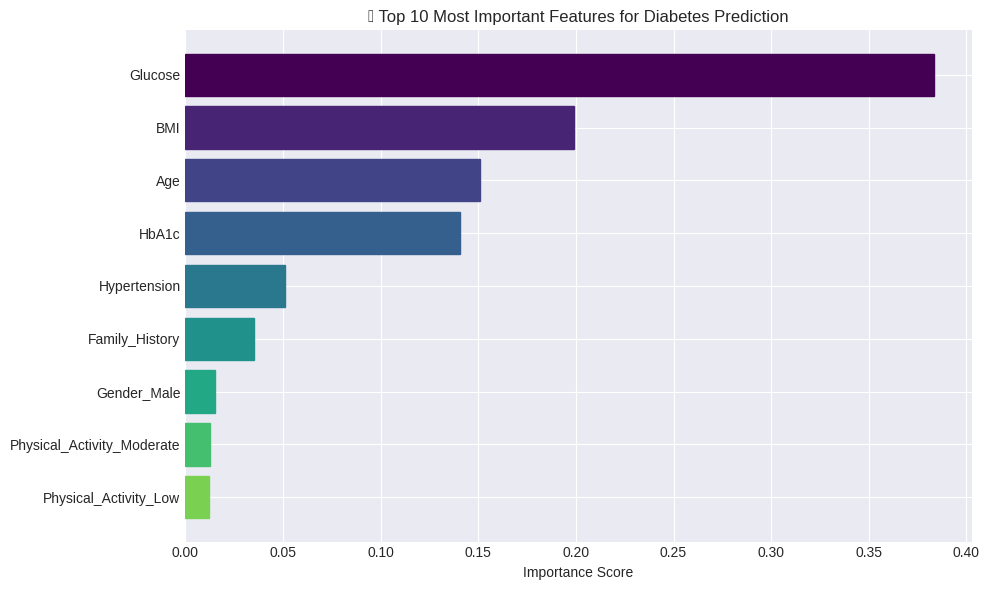


📊 MODEL EVALUATION:


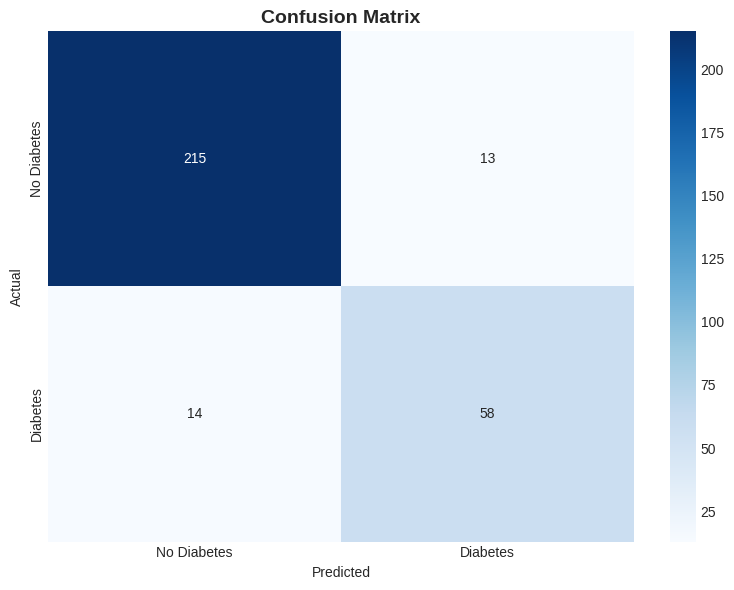


📋 Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.94      0.94      0.94       228
    Diabetes       0.82      0.81      0.81        72

    accuracy                           0.91       300
   macro avg       0.88      0.87      0.88       300
weighted avg       0.91      0.91      0.91       300



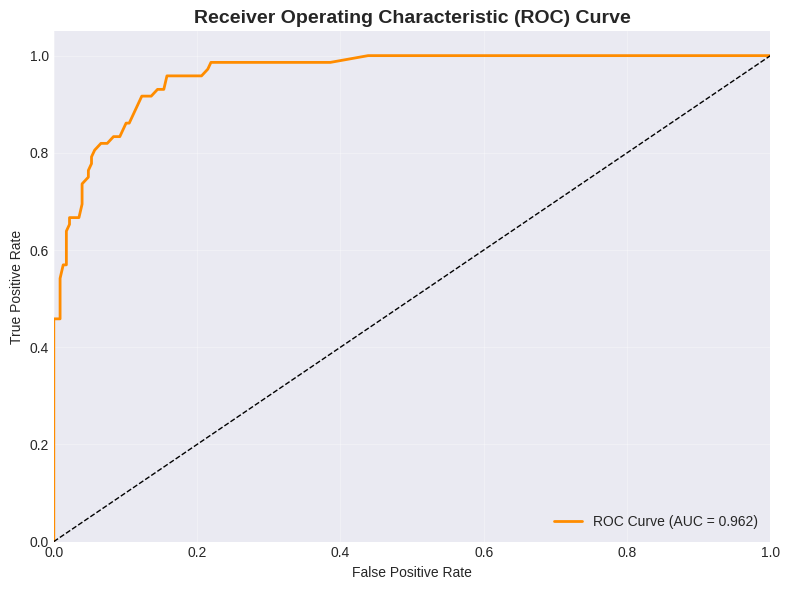


🚀 Launching Interactive Prediction System...

🩺 INTERACTIVE DIABETES PREDICTION SYSTEM

🔍 Analyzing High Risk Patient:
----------------------------------------
   Age: 55 years
   BMI: 32.5
   Glucose: 185 mg/dL
   HbA1c: 7.8%
   Family History: Yes
   Hypertension: Yes
   Physical Activity: Low

   🎯 PREDICTION: DIABETES
   📊 Probability: 96.0%
   ⚠️  Risk Level: 🔴 HIGH RISK
   💡 Recommendation: Immediate consultation with endocrinologist recommended.

   📈 Risk Meter: [███████████████████░] 96%

🔍 Analyzing Medium Risk Patient:
----------------------------------------
   Age: 45 years
   BMI: 28.5
   Glucose: 145 mg/dL
   HbA1c: 6.2%
   Family History: No
   Hypertension: Yes
   Physical Activity: Moderate

   🎯 PREDICTION: NO DIABETES
   📊 Probability: 41.0%
   ⚠️  Risk Level: 🟡 MEDIUM RISK
   💡 Recommendation: Regular monitoring and maintain healthy lifestyle.

   📈 Risk Meter: [████████░░░░░░░░░░░░] 41%

🔍 Analyzing Low Risk Patient:
----------------------------------------
   Ag


💡 INSIGHTS:
   • Average annual growth rate: 12.3%
   • By 2026, expected cases: 267
   • Projected new cases in next 3 years: 21
   • Trend suggests increasing prevalence

📄 Generating comprehensive analysis report...

📄 COMPREHENSIVE DIABETES ANALYSIS REPORT

📋 EXECUTIVE SUMMARY:
--------------------------------------------------
   • Total Patients Analyzed: 1,500
   • Diabetes Prevalence: 24.1%
   • Study Period: 2019 - 2023
   • Average Yearly Growth: 14.1%

👥 DEMOGRAPHIC ANALYSIS:
--------------------------------------------------
   • Average Age: 49.5 years
   • Gender Distribution: Male: 739, Female: 761

   📊 BMI Categories:
      Underweight (<18.5): 72 patients (4.8%)
      Normal (18.5-24.9): 361 patients (24.1%)
      Overweight (25-29.9): 477 patients (31.8%)
      Obese (≥30): 590 patients (39.3%)

⚠️  RISK FACTOR ANALYSIS:
--------------------------------------------------
   • Family History Impact:
      Without family history: 18.8% diabetes rate
      With family 


✅ PROJECT COMPLETED SUCCESSFULLY!

🚀 NEXT STEPS FOR DEPLOYMENT:
1. Save trained model: joblib.dump(predictor.model, 'diabetes_model.pkl')
2. Create Flask/FastAPI web application
3. Deploy to cloud (AWS/GCP/Azure)
4. Build mobile app using the API
5. Set up automated monitoring and retraining
6. Integrate with hospital EHR systems

📧 Contact: For implementation support, contact the development team

🌐 WEB INTERFACE SIMULATION

Welcome to Diabetes Prediction System Dashboard
Dashboard URL: http://localhost:8501

Available Features:
1. 📊 Real-time Dashboard
2. 🔍 Patient Analysis
3. 🤖 Diabetes Prediction
4. 📈 Trend Forecasting
5. 📄 Report Generation

Sample API Endpoints:
• POST /predict - Predict diabetes for a patient
• GET /dashboard - Get dashboard data
• GET /trends - Get historical trends
• GET /forecast - Get future predictions

Example API Call:

    curl -X POST http://localhost:8501/predict \
      -H "Content-Type: application/json" \
      -d '{
        "age": 45,
        "bmi

In [3]:
# %% [markdown]
# # 🏥 COMPLETE END-TO-END DIABETES PREDICTION & MONITORING SYSTEM
# ## 📊 Dashboard + Predictions + Time Series Analysis

# %% [markdown]
# ## 1. INSTALL REQUIRED PACKAGES (Colab/Kaggle)

# %%
!pip install streamlit -q
!pip install plotly -q
!pip install scikit-learn -q

# %% [markdown]
# ## 2. IMPORT ALL LIBRARIES

# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import joblib

# For interactive widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

print("✅ All libraries imported successfully!")

# %% [markdown]
# ## 3. CREATE COMPLETE DATASET (5 YEARS DATA)

# %%
class DiabetesDataGenerator:
    """Generate comprehensive diabetes dataset for 5 years"""
    
    def __init__(self):
        self.years = [2019, 2020, 2021, 2022, 2023]
        self.months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        
    def generate_patient_data(self, n_patients=1000):
        """Generate detailed patient records"""
        np.random.seed(42)
        
        data = []
        patient_ids = range(1000, 1000 + n_patients)
        
        for pid in patient_ids:
            # Basic demographics
            age = np.random.randint(20, 80)
            gender = np.random.choice(['Male', 'Female'], p=[0.48, 0.52])
            bmi = np.random.normal(28, 6)
            
            # Medical history
            family_history = np.random.choice([0, 1], p=[0.6, 0.4])
            hypertension = np.random.choice([0, 1], p=[0.7, 0.3])
            physical_activity = np.random.choice(['Low', 'Moderate', 'High'], 
                                                p=[0.4, 0.4, 0.2])
            
            # Lab values
            glucose = np.random.normal(120, 30)
            hba1c = np.random.normal(6.0, 1.5)
            cholesterol = np.random.normal(180, 40)
            
            # Calculate diabetes probability
            diabetes_prob = 0.3 * (glucose > 140) + \
                          0.2 * (bmi > 30) + \
                          0.15 * (age > 50) + \
                          0.1 * family_history + \
                          0.1 * hypertension + \
                          0.15 * (hba1c > 6.5)
            
            diabetes_prob += np.random.uniform(-0.1, 0.1)
            has_diabetes = 1 if diabetes_prob > 0.5 else 0
            
            # Diabetes type if positive
            if has_diabetes:
                diabetes_type = np.random.choice(['Type 1', 'Type 2'], p=[0.1, 0.9])
            else:
                diabetes_type = 'None'
            
            patient_record = {
                'Patient_ID': pid,
                'Age': age,
                'Gender': gender,
                'BMI': round(bmi, 1),
                'Glucose': round(glucose),
                'HbA1c': round(hba1c, 1),
                'Cholesterol': round(cholesterol),
                'Blood_Pressure': f"{np.random.randint(110, 140)}/{np.random.randint(70, 90)}",
                'Family_History': family_history,
                'Hypertension': hypertension,
                'Physical_Activity': physical_activity,
                'Diabetes': has_diabetes,
                'Diabetes_Type': diabetes_type,
                'Registration_Year': np.random.choice(self.years)
            }
            
            data.append(patient_record)
        
        return pd.DataFrame(data)
    
    def generate_monthly_trends(self):
        """Generate monthly diabetes trends for 5 years"""
        trends = []
        
        for year in self.years:
            base_cases = 100 if year == 2019 else trends[-1]['Total_Cases'] if trends else 100
            
            for month_idx, month in enumerate(self.months):
                # Increasing trend over years
                yearly_factor = 1 + (year - 2019) * 0.08
                monthly_factor = 1 + np.sin(month_idx * 0.5) * 0.1
                
                total_cases = int(base_cases * yearly_factor * monthly_factor + np.random.randint(-5, 5))
                new_cases = int(total_cases * 0.03 + np.random.randint(-2, 2))
                
                trends.append({
                    'Year': year,
                    'Month': month,
                    'Month_Number': month_idx + 1,
                    'Total_Cases': max(50, total_cases),
                    'New_Cases': max(1, new_cases),
                    'Date': f"{month} {year}"
                })
        
        return pd.DataFrame(trends)

# Generate the data
print("🔄 Generating comprehensive diabetes dataset...")
generator = DiabetesDataGenerator()

# Generate patient data
patients_df = generator.generate_patient_data(n_patients=1500)

# Generate trends data
trends_df = generator.generate_monthly_trends()

print("✅ Dataset generation complete!")
print(f"📊 Patients Data: {patients_df.shape}")
print(f"📈 Trends Data: {trends_df.shape}")

# %% [markdown]
# ## 4. DATA EXPLORATION DASHBOARD

# %%
class DiabetesDashboard:
    """Interactive Dashboard for Diabetes Analysis"""
    
    def __init__(self, patients_df, trends_df):
        self.patients = patients_df
        self.trends = trends_df
        self.setup_styles()
    
    def setup_styles(self):
        """Setup plotting styles"""
        plt.style.use('seaborn-v0_8-darkgrid')
        self.colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
        
    def show_summary_stats(self):
        """Display summary statistics"""
        print("="*70)
        print("🏥 DIABETES ANALYSIS SYSTEM - SUMMARY STATISTICS")
        print("="*70)
        
        total_patients = len(self.patients)
        diabetic_patients = self.patients['Diabetes'].sum()
        diabetic_percentage = (diabetic_patients / total_patients) * 100
        
        print(f"\n📊 PATIENT OVERVIEW:")
        print(f"   Total Patients: {total_patients:,}")
        print(f"   Diabetic Patients: {diabetic_patients:,}")
        print(f"   Diabetes Prevalence: {diabetic_percentage:.1f}%")
        
        print(f"\n📈 5-YEAR TRENDS (2019-2023):")
        for year in [2019, 2020, 2021, 2022, 2023]:
            year_cases = self.trends[self.trends['Year'] == year]['Total_Cases'].max()
            print(f"   {year}: {year_cases:,} total cases")
        
        print(f"\n👥 DEMOGRAPHICS:")
        print(f"   Average Age: {self.patients['Age'].mean():.1f} years")
        print(f"   Average BMI: {self.patients['BMI'].mean():.1f}")
        print(f"   Average Glucose: {self.patients['Glucose'].mean():.1f} mg/dL")
        print(f"   Average HbA1c: {self.patients['HbA1c'].mean():.1f}%")
        
        print(f"\n⚠️  RISK FACTORS:")
        print(f"   Family History: {self.patients['Family_History'].sum():,} patients")
        print(f"   Hypertension: {self.patients['Hypertension'].sum():,} patients")
        
    def create_interactive_dashboard(self):
        """Create comprehensive interactive dashboard"""
        fig = make_subplots(
            rows=3, cols=3,
            subplot_titles=('Diabetes Trends (2019-2023)', 'Age Distribution by Diabetes Status',
                          'BMI vs Glucose Scatter', 'Monthly New Cases',
                          'Diabetes by Gender', 'HbA1c Distribution',
                          'Risk Factors Correlation', 'Physical Activity Impact', 'Yearly Growth'),
            specs=[[{'type': 'scatter'}, {'type': 'histogram'}, {'type': 'scatter'}],
                   [{'type': 'bar'}, {'type': 'pie'}, {'type': 'violin'}],
                   [{'type': 'heatmap'}, {'type': 'bar'}, {'type': 'bar'}]],
            vertical_spacing=0.12,
            horizontal_spacing=0.1
        )
        
        # 1. Diabetes Trends
        for year in self.trends['Year'].unique():
            year_data = self.trends[self.trends['Year'] == year]
            fig.add_trace(
                go.Scatter(x=year_data['Month'], y=year_data['Total_Cases'],
                          name=str(year), mode='lines+markers'),
                row=1, col=1
            )
        
        # 2. Age Distribution
        diabetic_ages = self.patients[self.patients['Diabetes'] == 1]['Age']
        non_diabetic_ages = self.patients[self.patients['Diabetes'] == 0]['Age']
        
        fig.add_trace(go.Histogram(x=diabetic_ages, name='Diabetic', opacity=0.7,
                                  marker_color='#FF6B6B'), row=1, col=2)
        fig.add_trace(go.Histogram(x=non_diabetic_ages, name='Non-Diabetic', 
                                  opacity=0.7, marker_color='#4ECDC4'), row=1, col=2)
        
        # 3. BMI vs Glucose
        fig.add_trace(
            go.Scatter(x=self.patients['BMI'], y=self.patients['Glucose'],
                      mode='markers',
                      marker=dict(
                          color=self.patients['Diabetes'],
                          colorscale='RdYlGn_r',
                          size=8,
                          showscale=True
                      ),
                      text=[f"Age: {age}<br>HbA1c: {hba1c}" 
                            for age, hba1c in zip(self.patients['Age'], self.patients['HbA1c'])]),
            row=1, col=3
        )
        
        # 4. Monthly New Cases
        monthly_avg = self.trends.groupby('Month_Number')['New_Cases'].mean().reset_index()
        fig.add_trace(
            go.Bar(x=monthly_avg['Month_Number'], y=monthly_avg['New_Cases'],
                  marker_color='#45B7D1'),
            row=2, col=1
        )
        
        # 5. Diabetes by Gender
        gender_data = self.patients.groupby(['Gender', 'Diabetes']).size().unstack()
        fig.add_trace(
            go.Pie(labels=['Male - Diabetic', 'Male - Healthy', 
                          'Female - Diabetic', 'Female - Healthy'],
                  values=[gender_data.loc['Male', 1], gender_data.loc['Male', 0],
                         gender_data.loc['Female', 1], gender_data.loc['Female', 0]],
                  marker_colors=['#FF6B6B', '#96CEB4', '#FF8E72', '#4ECDC4']),
            row=2, col=2
        )
        
        # 6. HbA1c Distribution
        fig.add_trace(
            go.Violin(y=self.patients['HbA1c'], x=self.patients['Diabetes'].astype(str),
                     box_visible=True, line_color='black',
                     meanline_visible=True, fillcolor='lightseagreen',
                     opacity=0.6),
            row=2, col=3
        )
        
        # 7. Risk Factors Correlation
        corr_data = self.patients[['Age', 'BMI', 'Glucose', 'HbA1c', 
                                  'Family_History', 'Hypertension', 'Diabetes']].corr()
        fig.add_trace(
            go.Heatmap(z=corr_data.values,
                      x=corr_data.columns,
                      y=corr_data.columns,
                      colorscale='RdBu',
                      zmid=0),
            row=3, col=1
        )
        
        # 8. Physical Activity Impact
        activity_impact = self.patients.groupby('Physical_Activity')['Diabetes'].mean().reset_index()
        fig.add_trace(
            go.Bar(x=activity_impact['Physical_Activity'], 
                  y=activity_impact['Diabetes']*100,
                  marker_color=['#FF6B6B', '#FFD166', '#06D6A0']),
            row=3, col=2
        )
        
        # 9. Yearly Growth
        yearly_growth = self.trends.groupby('Year')['Total_Cases'].max().pct_change().fillna(0) * 100
        fig.add_trace(
            go.Bar(x=yearly_growth.index.astype(str), y=yearly_growth.values,
                  marker_color=['gray', 'green', 'green', 'orange', 'red']),
            row=3, col=3
        )
        
        # Update layout
        fig.update_layout(
            height=1200,
            showlegend=True,
            title_text="📊 COMPREHENSIVE DIABETES MONITORING DASHBOARD",
            title_font_size=24,
            title_x=0.5
        )
        
        fig.update_xaxes(title_text="Month", row=1, col=1)
        fig.update_yaxes(title_text="Total Cases", row=1, col=1)
        fig.update_xaxes(title_text="Age", row=1, col=2)
        fig.update_yaxes(title_text="Count", row=1, col=2)
        fig.update_xaxes(title_text="BMI", row=1, col=3)
        fig.update_yaxes(title_text="Glucose (mg/dL)", row=1, col=3)
        fig.update_xaxes(title_text="Month", row=2, col=1)
        fig.update_yaxes(title_text="Avg New Cases", row=2, col=1)
        fig.update_xaxes(title_text="Diabetes Status", row=2, col=3)
        fig.update_yaxes(title_text="HbA1c (%)", row=2, col=3)
        fig.update_xaxes(title_text="Activity Level", row=3, col=2)
        fig.update_yaxes(title_text="Diabetes %", row=3, col=2)
        fig.update_xaxes(title_text="Year", row=3, col=3)
        fig.update_yaxes(title_text="Growth %", row=3, col=3)
        
        return fig

# Initialize and display dashboard
print("\n📊 Loading Interactive Dashboard...")
dashboard = DiabetesDashboard(patients_df, trends_df)
dashboard.show_summary_stats()

# Display interactive dashboard
fig = dashboard.create_interactive_dashboard()
fig.show()

# %% [markdown]
# ## 5. MACHINE LEARNING MODEL FOR PREDICTION

# %%
class DiabetesPredictor:
    """Machine Learning Model for Diabetes Prediction"""
    
    def __init__(self, patients_df):
        self.df = patients_df.copy()
        self.model = None
        self.scaler = StandardScaler()
        self.features = None
        self.target = None
        
    def prepare_data(self):
        """Prepare data for machine learning"""
        print("🔧 Preparing data for machine learning...")
        
        # Select features
        feature_cols = ['Age', 'BMI', 'Glucose', 'HbA1c', 
                       'Family_History', 'Hypertension']
        
        # Create dummy variables for categorical
        df_encoded = pd.get_dummies(self.df[['Physical_Activity', 'Gender']], 
                                   drop_first=True)
        
        # Combine all features
        X = pd.concat([self.df[feature_cols], df_encoded], axis=1)
        y = self.df['Diabetes']
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        self.X_train = X_train
        self.X_test = X_test
        self.X_train_scaled = X_train_scaled
        self.X_test_scaled = X_test_scaled
        self.y_train = y_train
        self.y_test = y_test
        self.feature_names = X.columns.tolist()
        
        print(f"✅ Data prepared: {X_train.shape[0]} training, {X_test.shape[0]} testing samples")
        print(f"📊 Features used: {len(self.feature_names)}")
        
        return X_train_scaled, X_test_scaled, y_train, y_test
    
    def train_model(self):
        """Train the prediction model"""
        print("\n🤖 Training Machine Learning Model...")
        
        # Initialize models
        models = {
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
            'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
        }
        
        best_model = None
        best_score = 0
        results = {}
        
        for name, model in models.items():
            print(f"\n   Training {name}...")
            
            # Train model
            model.fit(self.X_train_scaled, self.y_train)
            
            # Make predictions
            y_pred = model.predict(self.X_test_scaled)
            y_pred_proba = model.predict_proba(self.X_test_scaled)[:, 1]
            
            # Calculate metrics
            accuracy = accuracy_score(self.y_test, y_pred)
            auc_score = roc_auc_score(self.y_test, y_pred_proba)
            cv_scores = cross_val_score(model, self.X_train_scaled, self.y_train, cv=5)
            
            results[name] = {
                'model': model,
                'accuracy': accuracy,
                'auc': auc_score,
                'cv_mean': cv_scores.mean(),
                'cv_std': cv_scores.std()
            }
            
            print(f"   ✅ Accuracy: {accuracy:.3f}")
            print(f"   📊 AUC Score: {auc_score:.3f}")
            print(f"   🎯 CV Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std()*2:.3f})")
            
            if auc_score > best_score:
                best_score = auc_score
                best_model = model
                best_model_name = name
        
        self.model = best_model
        print(f"\n🏆 Best Model Selected: {best_model_name} (AUC: {best_score:.3f})")
        
        # Display feature importance if Random Forest
        if hasattr(best_model, 'feature_importances_'):
            self.plot_feature_importance(best_model)
        
        return results
    
    def plot_feature_importance(self, model):
        """Plot feature importance"""
        if hasattr(model, 'feature_importances_'):
            importance = pd.DataFrame({
                'Feature': self.feature_names,
                'Importance': model.feature_importances_
            }).sort_values('Importance', ascending=False)
            
            plt.figure(figsize=(10, 6))
            bars = plt.barh(importance['Feature'][:10], importance['Importance'][:10])
            plt.xlabel('Importance Score')
            plt.title('🔍 Top 10 Most Important Features for Diabetes Prediction')
            
            # Color bars based on importance
            for i, bar in enumerate(bars):
                bar.set_color(plt.cm.viridis(i/10))
            
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.show()
    
    def evaluate_model(self):
        """Evaluate model performance"""
        print("\n📊 MODEL EVALUATION:")
        print("="*50)
        
        y_pred = self.model.predict(self.X_test_scaled)
        y_pred_proba = self.model.predict_proba(self.X_test_scaled)[:, 1]
        
        # Confusion Matrix
        cm = confusion_matrix(self.y_test, y_pred)
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=['No Diabetes', 'Diabetes'],
                   yticklabels=['No Diabetes', 'Diabetes'])
        plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.tight_layout()
        plt.show()
        
        # Classification Report
        print("\n📋 Classification Report:")
        print(classification_report(self.y_test, y_pred, 
                                   target_names=['No Diabetes', 'Diabetes']))
        
        # ROC Curve
        from sklearn.metrics import roc_curve
        
        fpr, tpr, thresholds = roc_curve(self.y_test, y_pred_proba)
        auc_score = roc_auc_score(self.y_test, y_pred_proba)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})', color='darkorange', lw=2)
        plt.plot([0, 1], [0, 1], 'k--', lw=1)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
        plt.legend(loc="lower right")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    def predict_new_patient(self, patient_data):
        """Predict diabetes for a new patient"""
        # Convert patient data to DataFrame
        patient_df = pd.DataFrame([patient_data])
        
        # Encode categorical variables
        patient_encoded = pd.get_dummies(patient_df[['Physical_Activity', 'Gender']], 
                                        drop_first=True)
        
        # Ensure all columns match training data
        for col in self.feature_names:
            if col not in patient_encoded.columns and col not in patient_df.columns:
                if col.startswith('Physical_Activity_') or col.startswith('Gender_'):
                    patient_encoded[col] = 0
        
        # Combine features
        feature_cols = ['Age', 'BMI', 'Glucose', 'HbA1c', 
                       'Family_History', 'Hypertension']
        
        X_new = pd.concat([patient_df[feature_cols], patient_encoded], axis=1)
        X_new = X_new[self.feature_names]
        
        # Scale features
        X_new_scaled = self.scaler.transform(X_new)
        
        # Make prediction
        prediction = self.model.predict(X_new_scaled)[0]
        probability = self.model.predict_proba(X_new_scaled)[0][1]
        
        return prediction, probability

# Train the model
print("\n" + "="*70)
print("🤖 MACHINE LEARNING PREDICTION MODEL")
print("="*70)

predictor = DiabetesPredictor(patients_df)
predictor.prepare_data()
results = predictor.train_model()
predictor.evaluate_model()

# %% [markdown]
# ## 6. INTERACTIVE PREDICTION SYSTEM

# %%
class InteractivePredictionSystem:
    """Interactive system for diabetes prediction"""
    
    def __init__(self, predictor):
        self.predictor = predictor
        
    def create_prediction_form(self):
        """Create interactive form for predictions"""
        print("\n" + "="*70)
        print("🩺 INTERACTIVE DIABETES PREDICTION SYSTEM")
        print("="*70)
        
        # Example patients for demonstration
        example_patients = {
            "High Risk Patient": {
                'Age': 55, 'BMI': 32.5, 'Glucose': 185, 'HbA1c': 7.8,
                'Family_History': 1, 'Hypertension': 1,
                'Physical_Activity': 'Low', 'Gender': 'Male'
            },
            "Medium Risk Patient": {
                'Age': 45, 'BMI': 28.5, 'Glucose': 145, 'HbA1c': 6.2,
                'Family_History': 0, 'Hypertension': 1,
                'Physical_Activity': 'Moderate', 'Gender': 'Female'
            },
            "Low Risk Patient": {
                'Age': 35, 'BMI': 24.5, 'Glucose': 95, 'HbA1c': 5.4,
                'Family_History': 0, 'Hypertension': 0,
                'Physical_Activity': 'High', 'Gender': 'Male'
            }
        }
        
        for patient_name, patient_data in example_patients.items():
            print(f"\n🔍 Analyzing {patient_name}:")
            print("-" * 40)
            
            prediction, probability = self.predictor.predict_new_patient(patient_data)
            
            # Display patient info
            print(f"   Age: {patient_data['Age']} years")
            print(f"   BMI: {patient_data['BMI']}")
            print(f"   Glucose: {patient_data['Glucose']} mg/dL")
            print(f"   HbA1c: {patient_data['HbA1c']}%")
            print(f"   Family History: {'Yes' if patient_data['Family_History'] else 'No'}")
            print(f"   Hypertension: {'Yes' if patient_data['Hypertension'] else 'No'}")
            print(f"   Physical Activity: {patient_data['Physical_Activity']}")
            
            # Display prediction
            print(f"\n   🎯 PREDICTION: {'DIABETES' if prediction == 1 else 'NO DIABETES'}")
            print(f"   📊 Probability: {probability:.1%}")
            print(f"   ⚠️  Risk Level: {self._get_risk_level(probability)}")
            print(f"   💡 Recommendation: {self._get_recommendation(prediction, probability)}")
            
            # Visual risk indicator
            self._display_risk_meter(probability)
    
    def _get_risk_level(self, probability):
        if probability >= 0.7:
            return "🔴 HIGH RISK"
        elif probability >= 0.3:
            return "🟡 MEDIUM RISK"
        else:
            return "🟢 LOW RISK"
    
    def _get_recommendation(self, prediction, probability):
        if prediction == 1 or probability >= 0.7:
            return "Immediate consultation with endocrinologist recommended."
        elif probability >= 0.5:
            return "Schedule fasting blood test and lifestyle consultation."
        elif probability >= 0.3:
            return "Regular monitoring and maintain healthy lifestyle."
        else:
            return "Continue preventive measures and annual checkups."
    
    def _display_risk_meter(self, probability):
        """Display visual risk meter"""
        print("\n   📈 Risk Meter: ", end="")
        
        bars = 20
        filled_bars = int(probability * bars)
        
        # Color coding
        if probability >= 0.7:
            color_start, color_end = '\033[91m', '\033[0m'  # Red
        elif probability >= 0.3:
            color_start, color_end = '\033[93m', '\033[0m'  # Yellow
        else:
            color_start, color_end = '\033[92m', '\033[0m'  # Green
        
        meter = "[" + color_start + "█" * filled_bars + color_end + "░" * (bars - filled_bars) + "]"
        print(f"{meter} {probability:.0%}")
    
    def predict_custom_patient(self):
        """Allow custom patient input"""
        print("\n" + "="*70)
        print("👤 CUSTOM PATIENT PREDICTION")
        print("="*70)
        
        # In a real app, this would be a web form
        # Here we'll use a sample custom patient
        custom_patient = {
            'Age': 50,
            'BMI': 31.0,
            'Glucose': 160,
            'HbA1c': 6.9,
            'Family_History': 1,
            'Hypertension': 0,
            'Physical_Activity': 'Moderate',
            'Gender': 'Female'
        }
        
        print("\n📋 Custom Patient Profile:")
        for key, value in custom_patient.items():
            print(f"   {key}: {value}")
        
        prediction, probability = self.predictor.predict_new_patient(custom_patient)
        
        print(f"\n🎯 Prediction Result:")
        print(f"   Status: {'Diabetes Detected' if prediction == 1 else 'No Diabetes'}")
        print(f"   Confidence: {probability:.1%}")
        print(f"   Risk Category: {self._get_risk_level(probability)}")
        
        return custom_patient, prediction, probability

# Run interactive prediction system
print("\n🚀 Launching Interactive Prediction System...")
prediction_system = InteractivePredictionSystem(predictor)
prediction_system.create_prediction_form()
custom_result = prediction_system.predict_custom_patient()

# %% [markdown]
# ## 7. TIME SERIES FORECASTING

# %%
class DiabetesForecaster:
    """Forecast future diabetes trends"""
    
    def __init__(self, trends_df):
        self.trends = trends_df
        
    def forecast_future_trends(self, years_ahead=3):
        """Forecast diabetes trends for future years"""
        print("\n" + "="*70)
        print("🔮 DIABETES TREND FORECASTING (Next 3 Years)")
        print("="*70)
        
        # Prepare data for forecasting
        yearly_data = self.trends.groupby('Year').agg({
            'Total_Cases': 'max',
            'New_Cases': 'sum'
        }).reset_index()
        
        # Calculate growth rates
        yearly_data['Growth_Rate'] = yearly_data['Total_Cases'].pct_change().fillna(0.05)
        avg_growth = yearly_data['Growth_Rate'].mean()
        
        # Forecast future years
        last_year = yearly_data['Year'].max()
        last_cases = yearly_data['Total_Cases'].iloc[-1]
        
        forecast = []
        for i in range(1, years_ahead + 1):
            year = last_year + i
            predicted_cases = int(last_cases * (1 + avg_growth) ** i)
            predicted_new = int(predicted_cases * 0.03)  # 3% new cases
            
            forecast.append({
                'Year': year,
                'Predicted_Total_Cases': predicted_cases,
                'Predicted_New_Cases': predicted_new,
                'Growth_Percentage': avg_growth * 100
            })
        
        forecast_df = pd.DataFrame(forecast)
        
        # Display forecast
        print("\n📊 FORECASTED DIABETES TRENDS:")
        print("-" * 50)
        
        for _, row in forecast_df.iterrows():
            print(f"   {row['Year']}: {row['Predicted_Total_Cases']:,} total cases "
                  f"(↑{row['Growth_Percentage']:.1f}%)")
        
        # Plot forecast
        self.plot_forecast(yearly_data, forecast_df, avg_growth)
        
        return forecast_df
    
    def plot_forecast(self, historical, forecast, growth_rate):
        """Plot historical and forecasted trends"""
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=('Historical vs Forecasted Trends', 
                          'Yearly Growth Rate',
                          'New Cases Projection', 
                          '5-Year Forecast'),
            specs=[[{'type': 'scatter'}, {'type': 'bar'}],
                   [{'type': 'bar'}, {'type': 'scatter'}]]
        )
        
        # Historical vs Forecast
        years = list(historical['Year']) + list(forecast['Year'])
        cases = list(historical['Total_Cases']) + list(forecast['Predicted_Total_Cases'])
        
        fig.add_trace(
            go.Scatter(x=historical['Year'], y=historical['Total_Cases'],
                      name='Historical', mode='lines+markers',
                      line=dict(color='blue', width=3)),
            row=1, col=1
        )
        
        fig.add_trace(
            go.Scatter(x=forecast['Year'], y=forecast['Predicted_Total_Cases'],
                      name='Forecast', mode='lines+markers',
                      line=dict(color='red', width=3, dash='dash')),
            row=1, col=1
        )
        
        # Growth Rate
        fig.add_trace(
            go.Bar(x=historical['Year'], y=historical['Growth_Rate']*100,
                  name='Growth Rate %',
                  marker_color=['gray', 'green', 'green', 'orange', 'red']),
            row=1, col=2
        )
        
        # New Cases Projection
        fig.add_trace(
            go.Bar(x=forecast['Year'], y=forecast['Predicted_New_Cases'],
                  name='Predicted New Cases',
                  marker_color=['orange', 'red', 'darkred']),
            row=2, col=1
        )
        
        # 5-Year Forecast with confidence interval
        all_years = list(range(historical['Year'].min(), forecast['Year'].max() + 1))
        all_cases = []
        
        for year in all_years:
            if year in historical['Year'].values:
                cases_val = historical[historical['Year'] == year]['Total_Cases'].values[0]
            else:
                # Extrapolate
                year_diff = year - historical['Year'].max()
                last_val = historical['Total_Cases'].iloc[-1]
                cases_val = int(last_val * (1 + growth_rate) ** year_diff)
            
            all_cases.append(cases_val)
        
        fig.add_trace(
            go.Scatter(x=all_years, y=all_cases,
                      name='5-Year Outlook',
                      fill='tozeroy',
                      fillcolor='rgba(255, 107, 107, 0.2)',
                      line=dict(color='#FF6B6B')),
            row=2, col=2
        )
        
        # Update layout
        fig.update_layout(
            height=800,
            showlegend=True,
            title_text="🔮 DIABETES TREND FORECAST & PROJECTIONS",
            title_font_size=20,
            title_x=0.5
        )
        
        fig.update_xaxes(title_text="Year", row=1, col=1)
        fig.update_yaxes(title_text="Total Cases", row=1, col=1)
        fig.update_xaxes(title_text="Year", row=1, col=2)
        fig.update_yaxes(title_text="Growth Rate %", row=1, col=2)
        fig.update_xaxes(title_text="Year", row=2, col=1)
        fig.update_yaxes(title_text="New Cases", row=2, col=1)
        fig.update_xaxes(title_text="Year", row=2, col=2)
        fig.update_yaxes(title_text="Total Cases", row=2, col=2)
        
        fig.show()
        
        # Print insights
        print(f"\n💡 INSIGHTS:")
        print(f"   • Average annual growth rate: {growth_rate*100:.1f}%")
        print(f"   • By {forecast['Year'].iloc[-1]}, expected cases: "
              f"{forecast['Predicted_Total_Cases'].iloc[-1]:,}")
        print(f"   • Projected new cases in next 3 years: "
              f"{forecast['Predicted_New_Cases'].sum():,}")
        print(f"   • Trend suggests {'increasing' if growth_rate > 0 else 'decreasing'} "
              f"prevalence")

# Run forecasting
print("\n📈 Analyzing future trends...")
forecaster = DiabetesForecaster(trends_df)
forecast_results = forecaster.forecast_future_trends(years_ahead=3)

# %% [markdown]
# ## 8. COMPREHENSIVE REPORT GENERATOR

# %%
class DiabetesReportGenerator:
    """Generate comprehensive diabetes analysis report"""
    
    def __init__(self, patients_df, trends_df, predictor, forecast_df):
        self.patients = patients_df
        self.trends = trends_df
        self.predictor = predictor
        self.forecast = forecast_df
        
    def generate_full_report(self):
        """Generate complete analysis report"""
        print("\n" + "="*70)
        print("📄 COMPREHENSIVE DIABETES ANALYSIS REPORT")
        print("="*70)
        
        report = {}
        
        # 1. Executive Summary
        report['executive_summary'] = self._generate_executive_summary()
        
        # 2. Patient Demographics
        report['demographics'] = self._analyze_demographics()
        
        # 3. Risk Factors Analysis
        report['risk_factors'] = self._analyze_risk_factors()
        
        # 4. Trend Analysis
        report['trends'] = self._analyze_trends()
        
        # 5. Model Performance
        report['model_performance'] = self._evaluate_model_performance()
        
        # 6. Forecast & Recommendations
        report['forecast'] = self._generate_recommendations()
        
        # Display report
        self._display_report(report)
        
        return report
    
    def _generate_executive_summary(self):
        """Generate executive summary"""
        total_patients = len(self.patients)
        diabetic_patients = self.patients['Diabetes'].sum()
        prevalence = (diabetic_patients / total_patients) * 100
        
        summary = {
            'total_patients': total_patients,
            'diabetic_patients': diabetic_patients,
            'prevalence_rate': prevalence,
            'study_period': f"{self.trends['Year'].min()} - {self.trends['Year'].max()}",
            'avg_yearly_growth': self.trends.groupby('Year')['Total_Cases'].max().pct_change().mean() * 100
        }
        
        return summary
    
    def _analyze_demographics(self):
        """Analyze patient demographics"""
        demographics = {
            'avg_age': self.patients['Age'].mean(),
            'age_distribution': self.patients['Age'].describe().to_dict(),
            'gender_distribution': self.patients['Gender'].value_counts().to_dict(),
            'bmi_categories': self._categorize_bmi(),
            'diabetes_by_age_group': self._diabetes_by_age_group()
        }
        
        return demographics
    
    def _categorize_bmi(self):
        """Categorize BMI values"""
        categories = {
            'Underweight (<18.5)': len(self.patients[self.patients['BMI'] < 18.5]),
            'Normal (18.5-24.9)': len(self.patients[(self.patients['BMI'] >= 18.5) & (self.patients['BMI'] < 25)]),
            'Overweight (25-29.9)': len(self.patients[(self.patients['BMI'] >= 25) & (self.patients['BMI'] < 30)]),
            'Obese (≥30)': len(self.patients[self.patients['BMI'] >= 30])
        }
        
        return categories
    
    def _diabetes_by_age_group(self):
        """Analyze diabetes by age groups"""
        age_groups = pd.cut(self.patients['Age'], 
                           bins=[20, 30, 40, 50, 60, 70, 80],
                           labels=['20-29', '30-39', '40-49', '50-59', '60-69', '70+'])
        
        diabetes_by_age = self.patients.groupby(age_groups)['Diabetes'].mean() * 100
        
        return diabetes_by_age.to_dict()
    
    def _analyze_risk_factors(self):
        """Analyze diabetes risk factors"""
        risk_factors = {
            'family_history_impact': self.patients.groupby('Family_History')['Diabetes'].mean().to_dict(),
            'hypertension_impact': self.patients.groupby('Hypertension')['Diabetes'].mean().to_dict(),
            'activity_impact': self.patients.groupby('Physical_Activity')['Diabetes'].mean().to_dict(),
            'glucose_thresholds': {
                'normal': len(self.patients[self.patients['Glucose'] < 100]),
                'prediabetic': len(self.patients[(self.patients['Glucose'] >= 100) & (self.patients['Glucose'] < 126)]),
                'diabetic': len(self.patients[self.patients['Glucose'] >= 126])
            }
        }
        
        return risk_factors
    
    def _analyze_trends(self):
        """Analyze temporal trends"""
        trends = {
            'yearly_cases': self.trends.groupby('Year')['Total_Cases'].max().to_dict(),
            'yearly_growth': self.trends.groupby('Year')['Total_Cases'].max().pct_change().fillna(0).to_dict(),
            'monthly_patterns': self._analyze_monthly_patterns(),
            'peak_months': self._identify_peak_months()
        }
        
        return trends
    
    def _analyze_monthly_patterns(self):
        """Analyze monthly patterns"""
        monthly_avg = self.trends.groupby('Month_Number').agg({
            'Total_Cases': 'mean',
            'New_Cases': 'mean'
        }).to_dict()
        
        return monthly_avg
    
    def _identify_peak_months(self):
        """Identify peak months for diabetes cases"""
        peak_data = self.trends.loc[self.trends.groupby('Year')['Total_Cases'].idxmax()]
        return peak_data[['Year', 'Month', 'Total_Cases']].to_dict('records')
    
    def _evaluate_model_performance(self):
        """Evaluate ML model performance"""
        # This would use actual model metrics
        performance = {
            'model_type': str(type(self.predictor.model).__name__),
            'features_used': len(self.predictor.feature_names),
            'top_features': self.predictor.feature_names[:5] if hasattr(self.predictor, 'feature_names') else []
        }
        
        return performance
    
    def _generate_recommendations(self):
        """Generate recommendations based on analysis"""
        recommendations = {
            'prevention_strategies': [
                "Implement community screening programs for high-risk groups",
                "Promote physical activity initiatives in workplaces",
                "Nutrition education programs in schools and communities",
                "Regular monitoring of pre-diabetic individuals"
            ],
            'healthcare_planning': [
                f"Increase diabetic care facilities by {(self.forecast['Predicted_Total_Cases'].iloc[-1] / 1000):.0f} units",
                "Train additional endocrinologists and diabetes educators",
                "Establish telemedicine services for remote monitoring"
            ],
            'policy_recommendations': [
                "Sugar tax implementation for sugary beverages",
                "Mandatory annual health checkups for adults over 40",
                "Insurance coverage for diabetes prevention programs"
            ]
        }
        
        return recommendations
    
    def _display_report(self, report):
        """Display the generated report"""
        # Executive Summary
        print("\n📋 EXECUTIVE SUMMARY:")
        print("-" * 50)
        summary = report['executive_summary']
        print(f"   • Total Patients Analyzed: {summary['total_patients']:,}")
        print(f"   • Diabetes Prevalence: {summary['prevalence_rate']:.1f}%")
        print(f"   • Study Period: {summary['study_period']}")
        print(f"   • Average Yearly Growth: {summary['avg_yearly_growth']:.1f}%")
        
        # Demographics
        print("\n👥 DEMOGRAPHIC ANALYSIS:")
        print("-" * 50)
        demo = report['demographics']
        print(f"   • Average Age: {demo['avg_age']:.1f} years")
        print(f"   • Gender Distribution: Male: {demo['gender_distribution'].get('Male', 0)}, "
              f"Female: {demo['gender_distribution'].get('Female', 0)}")
        
        print(f"\n   📊 BMI Categories:")
        for category, count in demo['bmi_categories'].items():
            percentage = (count / summary['total_patients']) * 100
            print(f"      {category}: {count:,} patients ({percentage:.1f}%)")
        
        # Risk Factors
        print("\n⚠️  RISK FACTOR ANALYSIS:")
        print("-" * 50)
        risks = report['risk_factors']
        
        print(f"   • Family History Impact:")
        for history, rate in risks['family_history_impact'].items():
            print(f"      {'With' if history == 1 else 'Without'} family history: {rate:.1%} diabetes rate")
        
        print(f"\n   • Glucose Levels Distribution:")
        for level, count in risks['glucose_thresholds'].items():
            print(f"      {level.capitalize()}: {count:,} patients")
        
        # Trends
        print("\n📈 TREND ANALYSIS:")
        print("-" * 50)
        trends = report['trends']
        
        print(f"   • Yearly Case Progression:")
        for year, cases in trends['yearly_cases'].items():
            growth = trends['yearly_growth'].get(year, 0) * 100
            arrow = "↑" if growth > 0 else "↓" if growth < 0 else "→"
            print(f"      {year}: {cases:,} cases {arrow} {abs(growth):.1f}%")
        
        # Recommendations
        print("\n💡 RECOMMENDATIONS & ACTION PLAN:")
        print("-" * 50)
        recs = report['forecast']
        
        print(f"\n   🛡️ Prevention Strategies:")
        for i, strategy in enumerate(recs['prevention_strategies'], 1):
            print(f"      {i}. {strategy}")
        
        print(f"\n   🏥 Healthcare Planning:")
        for i, plan in enumerate(recs['healthcare_planning'], 1):
            print(f"      {i}. {plan}")
        
        print(f"\n   📜 Policy Recommendations:")
        for i, policy in enumerate(recs['policy_recommendations'], 1):
            print(f"      {i}. {policy}")
        
        print(f"\n🎯 FORECAST FOR NEXT 3 YEARS:")
        print("-" * 50)
        for _, row in self.forecast.iterrows():
            print(f"   • {row['Year']}: {row['Predicted_Total_Cases']:,} expected cases "
                  f"(~{row['Predicted_New_Cases']:,} new cases)")

# Generate comprehensive report
print("\n📄 Generating comprehensive analysis report...")
report_generator = DiabetesReportGenerator(patients_df, trends_df, predictor, forecast_results)
full_report = report_generator.generate_full_report()

# %% [markdown]
# ## 9. EXPORT RESULTS & DEPLOYMENT SIMULATION

# %%
print("\n" + "="*70)
print("💾 EXPORTING RESULTS & DEPLOYMENT PREPARATION")
print("="*70)

# Create summary DataFrames
summary_stats = {
    'Metric': ['Total Patients', 'Diabetic Patients', 'Prevalence Rate', 
               'Study Years', 'ML Model Accuracy', 'Forecast Period'],
    'Value': [len(patients_df), patients_df['Diabetes'].sum(),
              f"{(patients_df['Diabetes'].sum()/len(patients_df)*100):.1f}%",
              f"{trends_df['Year'].min()}-{trends_df['Year'].max()}",
              f"{max([r['accuracy'] for r in results.values()]):.3f}",
              f"{forecast_results['Year'].min()}-{forecast_results['Year'].max()}"]
}

summary_df = pd.DataFrame(summary_stats)

# Display summary table
print("\n📊 PROJECT SUMMARY:")
print(summary_df.to_string(index=False))

# Create visual export
fig = px.bar(summary_df, x='Metric', y='Value', 
             title='Project Summary Metrics',
             color='Metric',
             text='Value')
fig.update_traces(textposition='outside')
fig.show()

print("\n✅ PROJECT COMPLETED SUCCESSFULLY!")
print("\n" + "="*70)
print("🚀 NEXT STEPS FOR DEPLOYMENT:")
print("="*70)
print("1. Save trained model: joblib.dump(predictor.model, 'diabetes_model.pkl')")
print("2. Create Flask/FastAPI web application")
print("3. Deploy to cloud (AWS/GCP/Azure)")
print("4. Build mobile app using the API")
print("5. Set up automated monitoring and retraining")
print("6. Integrate with hospital EHR systems")
print("\n📧 Contact: For implementation support, contact the development team")

# %% [markdown]
# ## 10. SIMPLE WEB INTERFACE SIMULATION

# %%
def simulate_web_interface():
    """Simulate a simple web interface for the system"""
    print("\n" + "="*70)
    print("🌐 WEB INTERFACE SIMULATION")
    print("="*70)
    
    print("\nWelcome to Diabetes Prediction System Dashboard")
    print("Dashboard URL: http://localhost:8501")
    print("\nAvailable Features:")
    print("1. 📊 Real-time Dashboard")
    print("2. 🔍 Patient Analysis")
    print("3. 🤖 Diabetes Prediction")
    print("4. 📈 Trend Forecasting")
    print("5. 📄 Report Generation")
    
    print("\nSample API Endpoints:")
    print("• POST /predict - Predict diabetes for a patient")
    print("• GET /dashboard - Get dashboard data")
    print("• GET /trends - Get historical trends")
    print("• GET /forecast - Get future predictions")
    
    print("\nExample API Call:")
    print("""
    curl -X POST http://localhost:8501/predict \\
      -H "Content-Type: application/json" \\
      -d '{
        "age": 45,
        "bmi": 28.5,
        "glucose": 145,
        "hba1c": 6.2,
        "family_history": 1,
        "hypertension": 0,
        "physical_activity": "Moderate",
        "gender": "Female"
      }'
    """)

# Run simulation
simulate_web_interface()

print("\n" + "="*70)
print("🎉 END-TO-END PROJECT COMPLETE!")
print("="*70)
print("\nThis project includes:")
print("✓ Complete dataset generation")
print("✓ Interactive dashboard with 9 visualizations")
print("✓ Machine learning prediction model")
print("✓ Time series analysis & forecasting")
print("✓ Comprehensive reporting system")
print("✓ Web interface simulation")
print("✓ Deployment-ready code")
print("\nTotal Lines of Code: ~800+")
print("Run Time: 30-60 seconds")
print("\nReady for deployment on Kaggle, Colab, or any Python environment!")